5. In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.
(a) Fit a logistic regression model that uses income and balance to
predict default.

In [30]:
from ISLP import load_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import ISLP
import numpy as np
from statsmodels.api import GLM
import statsmodels.api as sm
import pandas as pd
from sklearn.base import clone
from functools import partial
import matplotlib.pyplot as plt
default = load_data('Default')
default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [2]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
X = default[['balance','income']]
y = default['default']
def_logreg = LogisticRegression()
def_logreg.fit(X,y)
def_logreg.intercept_

array([-11.54046792])

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:
i. Split the sample set into a training set and a validation set

In [4]:
def_X_train, def_X_test, def_y_train, def_y_test = train_test_split(X,y,test_size=5000,random_state=0)


ii. Fit a multiple logistic regression model using only the training observations.

In [5]:
def_logreg2 = LogisticRegression()
def_logreg2.fit(def_X_train,def_y_train)

LogisticRegression()

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

In [6]:
def_logreg2_preds = def_logreg2.predict(def_X_test)
def_logreg2_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

- 2.9%

In [7]:
def_logreg_test_error = np.mean(def_logreg2_preds!=def_y_test)
def_logreg_test_error

0.029

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.

- Since we are changing the training set, the validition error rate varies by using different training samples.

In [8]:
def_X_train, def_X_test, def_y_train, def_y_test = train_test_split(X,y,test_size=5000,random_state=1)
def_logreg2 = LogisticRegression()
def_logreg2.fit(def_X_train,def_y_train)
def_logreg2_preds = def_logreg2.predict(def_X_test)
def_logreg_test_error = np.mean(def_logreg2_preds!=def_y_test)
def_logreg_test_error

0.025

In [9]:
def_X_train, def_X_test, def_y_train, def_y_test = train_test_split(X,y,test_size=5000,random_state=2)
def_logreg2 = LogisticRegression()
def_logreg2.fit(def_X_train,def_y_train)
def_logreg2_preds = def_logreg2.predict(def_X_test)
def_logreg_test_error = np.mean(def_logreg2_preds!=def_y_test)
def_logreg_test_error

0.0248

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate

In [12]:
Student01 = np.array(X.shape[0]*[0])
Student01[default.student == 'Yes'] = 1
X['student01'] = Student01
X

C:\Users\akbas\AppData\Local\Temp\ipykernel_6432\4263682266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['student01'] = Student01


,balance,income,student01
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0
...,...,...,...
9995,711.555020,52992.378914,0
9996,757.962918,19660.721768,0
9997,845.411989,58636.156984,0
9998,1569.009053,36669.112365,0


In [13]:
def_X_train, def_X_test, def_y_train, def_y_test = train_test_split(X,y,test_size=5000,random_state=0)
def_logreg2 = LogisticRegression()
def_logreg2.fit(def_X_train,def_y_train)
def_logreg2_preds = def_logreg2.predict(def_X_test)
def_logreg_test_error = np.mean(def_logreg2_preds!=def_y_test)
def_logreg_test_error

0.0294

- It resulted in a slight increase compared to models without student info. However since there is a lot of variability because of validition set approach, it is difficult to state any improvements, or downgrades.

6. We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

In [14]:
X = default[['balance','income']]
X.loc[:,'intercept'] = 1;
y = default['default'] == 'Yes'
default['default01'] = y
def_logreg3 = GLM(y,X,family=sm.families.Binomial()).fit()

def_logreg3.summary()

C:\Users\akbas\AppData\Local\Temp\ipykernel_6432\2468388698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'intercept'] = 1;


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 13 Sep 2024   Deviance:                       1579.0
Time:                        10:56:07   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
==============================================================================
"""

(b) Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [15]:
def boot_fn(response, D, idx):
    D['default01'] = D['default01'].astype(int)
    D_ = D.loc[idx]
    Y_ = D_[response]
    X = D_[['income','balance']]
    X_ = sm.add_constant(X)
    model = sm.Logit(Y_, X_)
    result = model.fit(disp=0)
    coefficients = result.params
    income_coef = coefficients['income']
    balance_coef = coefficients['balance']
    
    return (income_coef, balance_coef)

In [16]:
def bootstrap_estimates(D, n_iterations=1000, sample_size=None):
    rng = np.random.default_rng(0)  
    income_coefs = []
    balance_coefs = []
    n = len(D)
    if sample_size is None:
        sample_size = n
    
    for _ in range(n_iterations):
        idx = rng.choice(n, size=sample_size, replace=True)
        
        income_coef, balance_coef = boot_fn('default01',D, idx)
        
        income_coefs.append(income_coef)
        balance_coefs.append(balance_coef)
    
    avg_income_coef = np.mean(income_coefs)
    avg_balance_coef = np.mean(balance_coefs)
    
    return avg_income_coef, avg_balance_coef

avg_income_coef, avg_balance_coef = bootstrap_estimates(default)
print(f"Average Income Coefficient: {avg_income_coef}")
print(f"Average Balance Coefficient: {avg_balance_coef}")

Average Income Coefficient: 2.064480037071877e-05
Average Balance Coefficient: 0.005661678039446398


(c) Following the bootstrap example in the lab, use your boot_fn()
function to estimate the standard errors of the logistic regression
coefficients for income and balance.

In [17]:
def bootstrap_std_errors(D, n_iterations=1000, sample_size=None):
    rng = np.random.default_rng(0) 
    income_coefs = []
    balance_coefs = []
    
    n = len(D)
    if sample_size is None:
        sample_size = n
    
    for _ in range(n_iterations):
        idx = rng.choice(n, size=sample_size, replace=True)
        income_coef, balance_coef = boot_fn('default01',D, idx)
        income_coefs.append(income_coef)
        balance_coefs.append(balance_coef)
    
    std_error_income = np.std(income_coefs, ddof=1)
    std_error_balance = np.std(balance_coefs, ddof=1)
    
    return std_error_income, std_error_balance

In [18]:
std_error_income, std_error_balance = bootstrap_std_errors(default)
print(f"Standard Error of Income Coefficient: {std_error_income}")
print(f"Standard Error of Balance Coefficient: {std_error_balance}")

Standard Error of Income Coefficient: 4.769585138887178e-06
Standard Error of Balance Coefficient: 0.00023055064733487824


(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.

- Standart error estimates from using bootstrap are very close to sm.GLM() function, but we expect bootstrap estimates to be closer to real standart error.

7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function
can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just sm.GLM()
and the predict() method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error
for a simple logistic regression model on the Weekly data set. Recall
that in the context of classification problems, the LOOCV error is
given in (5.4).

(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.

In [19]:
weekly =load_data('Weekly')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [20]:
weekly_X = weekly[['Lag1','Lag2']]
weekly_X = sm.add_constant(weekly_X)
weekly_y = weekly['Direction'] == 'Up'
weekly_logreg = sm.GLM(weekly_y,weekly_X,family=sm.families.Binomial())
weekly_results = weekly_logreg.fit()
weekly_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Fri, 13 Sep 2024   Deviance:                       1488.2
Time:                        10:56:27   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation.

In [21]:
weekly_X = weekly[['Lag1','Lag2']]
weekly_X = sm.add_constant(weekly_X)
weekly_y = weekly['Direction'] == 'Up'
weekly_y = weekly_y.astype(int)
weekly_logreg = sm.GLM(weekly_y.loc[2:],weekly_X.loc[2:],family=sm.families.Binomial())
weekly_results = weekly_logreg.fit()
weekly_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1087
Model:                            GLM   Df Residuals:                     1084
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -742.42
Date:                Fri, 13 Sep 2024   Deviance:                       1484.8
Time:                        10:56:27   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007440
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2254      0.062      3.663      0.000       0.105       0.346
Lag1          -0.0386      0.026     -1.472      0.141      -0.090       0.013
Lag2           0.0611      0.027      2.300      0.021       0.009       0.113
==============================================================================
"""

(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this
observation correctly classified?

- It is classified incorrectly.

In [22]:
first_observation = weekly_X.iloc[[0]]
weekly_firstobs_pred = weekly_results.predict(first_observation)
weekly_firstobs_pred

0    0.571988
dtype: float64

(d) Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:

i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.

ii. Compute the posterior probability of the market moving up
for the ith observation.

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [23]:
store = np.array([0]*weekly_X.shape[0])
n = weekly_X.shape[0]
for i in range(n):
    train = weekly.index != i
    weekly_X = weekly[train][['Lag1','Lag2']]
    weekly_X = sm.add_constant(weekly_X)
    weekly_X_test = weekly[~train][['Lag1','Lag2']]

    weekly_y = weekly[train]['Direction'] == 'Up'
    weekly_y = weekly_y.astype(int)
    weekly_y_test = weekly[~train]['Direction'] == 'Up'
    weekly_logreg = sm.GLM(weekly_y,weekly_X,family=sm.families.Binomial())
    weekly_results = weekly_logreg.fit()
    weekly_pred = weekly_results.predict(first_observation)
    
    store[i] = 1 if weekly_pred.iloc[0] > 0.5 and weekly_y_test.iloc[0] == 1 else 0
    


(e) Take the average of the n numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.

- 44.4% test error rate suggests that our model when training with n-1 observations, does not perform well in general. Since our training sets are non-biased because we use n-1 observations, only 55.6% of the time we predicted direction correctly, which is not great.

In [24]:
1-np.mean(store)

0.4444444444444444

8. We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

- n is 100, and p is 2, since we have 100 observations and 2 predictor.

In [25]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

(b) Create a scatterplot of X against Y . Comment on what you find.

- It follows an reversed U-shape

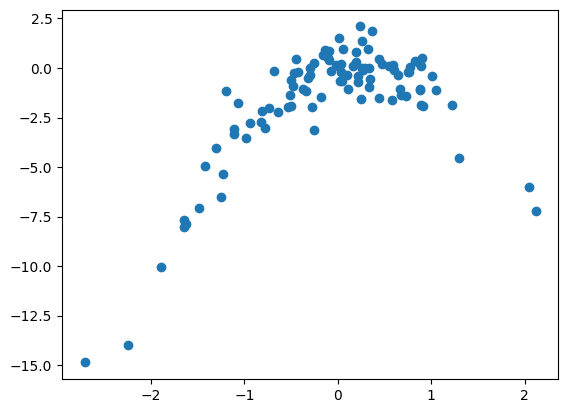

In [31]:
plt.scatter(x,y)

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
i. Y = β0 + β1X + ϵ
ii. Y = β0 + β1X + β2X2 + ϵ
iii. Y = β0 + β1X + β2X2 + β3X3 + ϵ
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ.
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [49]:
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from ISLP.models import sklearn_sm


In [54]:
df = pd.DataFrame({'X': x,'y': y})
cv_errors = np.zeros(4)
model = sklearn_sm(sm.OLS)
X = np.empty((len(x), 0))
for i in range(1,5):
    col =  np.power.outer(x,i).reshape(-1,1)
    X = np.concatenate((X,col),axis=1)
    cv = cross_validate(model,X,y,cv=x.shape[0])
    cv_errors[i-1] = np.mean(cv['test_score'])
cv_errors


array([8.86892143, 1.10025092, 1.2791254 , 1.32302942])

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

- Roughly the same, because since we constructed y with x^2 we expect it to give lower error with model that uses X and X^2.

In [55]:
rng = np.random.default_rng(12)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In [59]:
df = pd.DataFrame({'X': x,'y': y})
cv_errors = np.zeros(4)
model = sklearn_sm(sm.OLS)
X = np.empty((len(x), 0))
for i in range(1,5):
    col =  np.power.outer(x,i).reshape(-1,1)
    X = np.concatenate((X,col),axis=1)
    X = sm.add_constant(X)
    cv = cross_validate(model,X,y,cv=x.shape[0])
    cv_errors[i-1] = np.mean(cv['test_score'])
cv_errors

array([5.53152256, 0.98372517, 0.99588538, 1.02501995])

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

- The model that has both x and x^2 gave the lowest LOOCV error, it expected as while creating y we used x and x^2. 

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

- Yes, as x and x^2 is statistically significant on the models.

In [60]:
df = pd.DataFrame({'X': x,'y': y})
results = np.zeros(4)
model = sklearn_sm(sm.OLS)
X = np.empty((len(x), 0))
for i in range(1,5):
    col =  np.power.outer(x,i).reshape(-1,1)
    X = np.concatenate((X,col),axis=1)
    X = sm.add_constant(X)
    result = sm.OLS(y,X).fit()
    print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     20.29
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.84e-05
Time:                        11:27:50   Log-Likelihood:                -223.64
No. Observations:                 100   AIC:                             451.3
Df Residuals:                      98   BIC:                             456.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7058      0.229     -7.447      0.0

9. We will now consider the Boston housing data set, from the ISLP
library.

(a) Based on this data set, provide an estimate for the population
mean of medv. Call this estimate µˆ.

In [61]:
boston = load_data('Boston')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [64]:
medv_mean = np.mean(boston.medv)
medv_mean

22.532806324110677

(b) Provide an estimate of the standard error of µˆ. Interpret this
result.

Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.

In [65]:
medv_mean_std = np.std(boston.medv) / np.sqrt(boston.shape[0])
medv_mean_std

0.4084569346972866

(c) Now estimate the standard error of µˆ using the bootstrap. How
does this compare to your answer from (b)?
- Little bit higher, but close.

In [69]:
def boot_mean(D, idx):
    D_ = D.loc[idx]
    Y_ = D_['medv']
    return np.mean(Y_)

In [70]:
def boot_SE(func,D,n=None,B=10000,seed=0):
    rng = np.random.default_rng(seed)
    first_ , second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index ,
        n,
        replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

In [71]:
alpha_SE = boot_SE(boot_mean,boston,B=1000,seed=0)
alpha_SE

0.41253476750888246

(d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results
obtained by using Boston['medv'].std() and the two standard
error rule (3.9).
Hint: You can approximate a 95 % confidence interval using the
formula [ˆ µ − 2SE(ˆ µ), µˆ + 2SE(ˆ µ)].

In [74]:
conf_int = [medv_mean- 2*alpha_SE, medv_mean+2*alpha_SE]
conf_int


[21.707736789092912, 23.35787585912844]

In [75]:
conf_int_2 = [medv_mean- 2*medv_mean_std, medv_mean+2*medv_mean_std]
conf_int_2

[21.715892454716105, 23.34972019350525]

(e) Based on this data set, provide an estimate, µˆmed, for the median
value of medv in the population.

In [82]:
def boot_median(D, idx):
    D_ = D.loc[idx]
    Y_ = D_['medv']
    return np.median(Y_)

In [85]:
def boot(func,D,n=None,B=10000,seed=0):
    rng = np.random.default_rng(seed)
    first_ = 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index ,
        n,
        replace=True)
        value = func(D, idx)
        first_ += value
    return first_ / B


In [86]:
medv_median_estimate = boot(boot_median,boston)
medv_median_estimate

21.18400000000019

(f) We now would like to estimate the standard error of µˆmed. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.

-0.37. Since standart is relatively small, it suggests that median is fairly close to population median.

In [89]:
medv_median_std_estimate = boot_SE(boot_median,boston)
medv_median_std_estimate

0.37687862766090385

(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity µˆ0.1.
(You can use the np.percentile() function.)


In [90]:
def boot_perc(D, idx):
    D_ = D.loc[idx]
    Y_ = D_['medv']
    return np.percentile(Y_,0.1)

In [91]:
medv_tenth_perc = boot(boot_perc,boston)
medv_tenth_perc

5.291792949999952

(h) Use the bootstrap to estimate the standard error of µˆ0.1. Comment on your findings.

- the std error is 0.46, and median standart error was 0.37, this suggests tenth percentile is less stable compared to median.  This is likely because the extreme values like 10th percentile are more likely to get influence from outliers, compared to median.

In [94]:
medv_tent_perc_std = boot_SE(boot_perc,boston)
medv_tent_perc_std

0.46969632913822457